预准备工作

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #用来自定义图表风格的模块

#magic command
%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from matplotlib.font_manager import FontProperties #画图自定义字体
from pylab import mpl #画图自定义字体
mpl.rcParams['font.sans-serif']=['SimHei'] #指定默认字体

# 导入数据

In [54]:
#导入处理
data=pd.read_csv('E:/Python Github HW/ZhaoQy/000001-24.9.30.csv')
data['Day']=pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day',inplace=True)
data['Close']=pd.to_numeric(data['Close'],errors='coerce')
data['Preclose']=data['Close'].shift(1)  #实现数据平移，向下移动一行数据
data['Return']=(data['Close']-data['Preclose'])/data['Preclose']
data


,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1990-12-19,NaN,96.050,99.980,95.790,99.980,126000.00,4.940000e+05,NaN
1990-12-20,99.980,104.300,104.390,99.980,104.390,19700.00,8.400000e+04,0.044109
1990-12-21,104.390,109.070,109.130,103.730,109.130,2800.00,1.600000e+04,0.045407
1990-12-24,109.130,113.570,114.550,109.130,114.550,3200.00,3.100000e+04,0.049666
1990-12-25,114.550,120.090,120.250,114.550,120.250,1500.00,6.000000e+03,0.049760
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


# Monthly Return

In [55]:
data_new=data['1995-01-01':'2024-12-31'].copy()
Month_data=data_new.resample('ME')['Return'].apply(lambda x:(1+x).prod()-1).to_frame() #lambda：定义一个匿名函数
Month_data


,Return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


# 画图Plot

C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_15324\12662127.py:23: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.savefig('China_Stock_Market_Monthly_Return.pdf')
e:\Python class\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


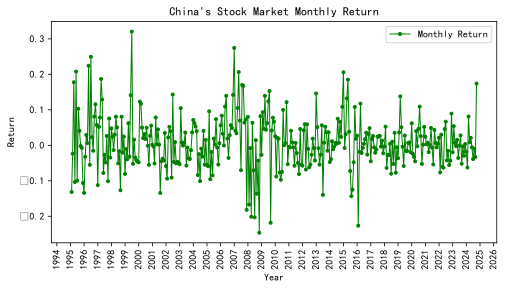

In [56]:
fig,ax=plt.subplots(figsize=(8,4))#选择图形大小

ax.plot('Return', #图片数据
'.-',#图片类型，
color='g',#图片颜色
label='Monthly Return',#图片标签
linewidth=1,#图片线宽
data=Month_data)#图片数据来源
ax.set_title("China's Stock Market Monthly Return")
ax.set_xlabel('Year')
ax.set_ylabel('Return')

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

#转制x轴的日期显示格式
plt.xticks(rotation=90)

#添加图例
plt.legend(loc='upper right',fontsize=10)
fig.savefig('China_Stock_Market_Monthly_Return.pdf')

plt.show();

DIY

C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_15324\2597888348.py:23: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.savefig('China_Stock_Market_Monthly_Return2.pdf')
e:\Python class\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


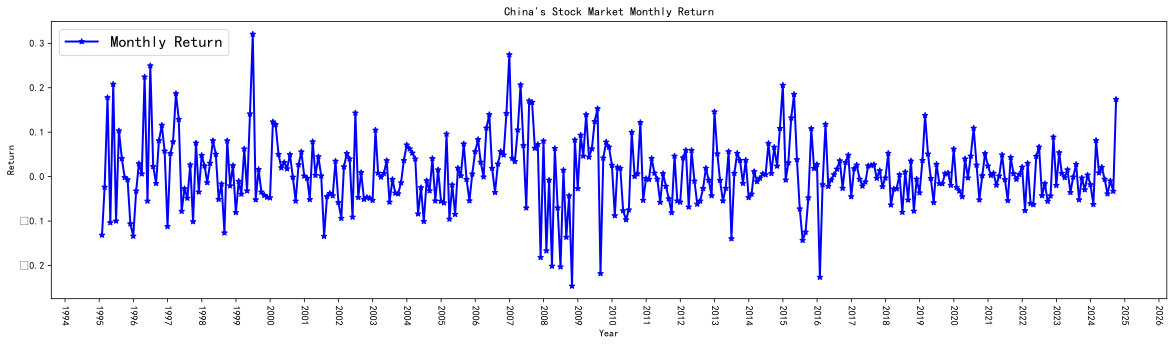

In [57]:
fig,ax=plt.subplots(figsize=(20,5))#选择图形大小（宽，高）

ax.plot('Return', #图片数据
'*-',#图片类型，（节点图案、线段）
color='b',#图片颜色（blue）
label='Monthly Return',#图片标签
linewidth=2,#图片线宽
data=Month_data)#图片数据来源
ax.set_title("China's Stock Market Monthly Return")
ax.set_xlabel('Year')
ax.set_ylabel('Return')

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y') #年
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

#转制x轴的日期显示格式
plt.xticks(rotation=270) #横轴数据转置270°

#添加图例
plt.legend(loc='upper left',fontsize=16) #图例位置：left
fig.savefig('China_Stock_Market_Monthly_Return2.pdf')

plt.show();

In [58]:
Month_data['2009':'2009']

,Return
Day,
2009-01-31,0.093283
2009-02-28,0.046311
2009-03-31,0.139405
2009-04-30,0.043974
2009-05-31,0.062707
2009-06-30,0.123980
2009-07-31,0.152972
2009-08-31,-0.218144
2009-09-30,0.041867


In [59]:
Month_data['2000':'2010']['Return'].mean()

0.009097037214487238

一些说明

In [60]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line pro

# 描述性统计

## 均值mean

mean()函数 

In [61]:
np.mean(Month_data['2000':'2024']['Return'])

0.005529576142575528

In [62]:
Month_data['2000':'2024']['Return'].mean().round(4)
#round():将浮点数四舍五入到指定的小数位数

0.0055

In [63]:
round(Month_data['2000':'2024']['Return'].mean(),4)

0.0055

In [64]:
print('中国股票市场平均月收益率为：',round(Month_data['2000':'2024']['Return'].mean()*100,4),"%",sep='')
#sep():分隔符

中国股票市场平均月收益率为：0.553%


In [65]:
Quarter_data=data_new.resample('QE')['Return'].apply(lambda x:(1+x).prod()-1).to_frame() #lambda：匿名函数 prod：连乘
print('中国股票市场平均季度收益率为：',round(Quarter_data['2000':'2024']['Return'].mean()*100,4),"%",sep='')

中国股票市场平均季度收益率为：1.8704%


In [66]:
sum(Month_data['2000':'2024']['Return'])/len(Month_data['2000':'2024']['Return'])

0.005529576142575528

股票回报率易出现极端情况

In [67]:
Month_data['2000':'2024']['Return'].describe()
#mean:均值0.005
#std:标准差0.07，若满足正态分布，超过两个标准差（-0.14，0.14）概率极小
#百分位数：25%50%75%

count    297.000000
mean       0.005530
std        0.070834
min       -0.246314
25%       -0.037767
50%        0.004454
75%        0.043145
max        0.274464
Name: Return, dtype: float64

第一组：-0.24<=R<=-0.037 (MIN-25%)

## 分位数

[20,38,43,60,73,78,81,83,86,100]
70分 40%分位数
84分 80%分位数

计算分位数：statistics-quantiles
寻找极端数据

In [68]:
from statistics import quantiles
quantiles(Month_data['2000':'2024']['Return'],n=10,method='inclusive')
#n:组数

[-0.06545943889095844,
 -0.04764503239014402,
 -0.02513160466380431,
 -0.006189046318517422,
 0.004453785546283395,
 0.018792518519076394,
 0.03570928787521495,
 0.0519280802231048,
 0.0857673953215623]

In [69]:
Month_data[Month_data['Return']> 0.052147828136706396]

,Return
Day,
1995-03-31,0.177803
1995-05-31,0.207922
1995-07-31,0.103032
1996-04-30,0.224249
1996-06-30,0.249514
...,...
2022-06-30,0.066592
2022-11-30,0.089115
2023-01-31,0.053868


In [70]:
Month_data[Month_data['Return']>0.018812575594151015]

,Return
Day,
1995-03-31,0.177803
1995-05-31,0.207922
1995-07-31,0.103032
1995-08-31,0.040716
1996-02-29,0.029013
...,...
2023-01-31,0.053868
2023-07-31,0.027788
2024-02-29,0.081269


极端大

In [71]:
Month_data[Month_data['Return']>0.2]

,Return
Day,
1995-05-31,0.207922
1996-04-30,0.224249
1996-06-30,0.249514
1999-06-30,0.320558
2006-12-31,0.274464
2007-04-30,0.206437
2014-12-31,0.205692


极端小

In [72]:
Month_data[Month_data['Return']<-0.2]

,Return
Day,
2008-03-31,-0.201408
2008-06-30,-0.203082
2008-10-31,-0.246314
2009-08-31,-0.218144
2016-01-31,-0.226487


## 标准差standard/方差variance
$$
\sigma^2=\frac{\sum{(R-\bar{R})^2}}{N}
$$


In [73]:
Month_variance=data_new.resample('ME')['Return'].var().to_frame()#var（）：方差
Month_variance.rename(columns={'Return':'Variance'},inplace=True)#重命名
Month_variance

,Variance
Day,
1995-01-31,0.000260
1995-02-28,0.001130
1995-03-31,0.000551
1995-04-30,0.000407
1995-05-31,0.006924
...,...
2024-05-31,0.000048
2024-06-30,0.000031
2024-07-31,0.000065


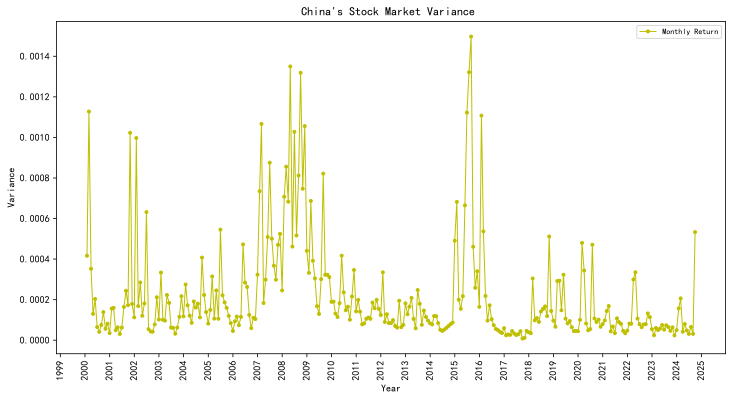

In [74]:
fig,ax=plt.subplots(figsize=(12,6))#选择图形大小

ax.plot('Variance', #图片数据
'.-',#图片类型，
color='y',#图片颜色
label='Monthly Return',#图片标签
linewidth=1,#图片线宽
data=Month_variance['2000':])#图片数据来源
ax.set_title("China's Stock Market Variance ")
ax.set_xlabel('Year')
ax.set_ylabel('Variance')

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

#转制x轴的日期显示格式
plt.xticks(rotation=90)

#添加图例
plt.legend(loc='upper right',fontsize=8)
fig.savefig('China_Stock_Market_Variance.pdf')

plt.show();

上面算法结果低估，应使用下面方法（均值对结果有一定影响）

In [75]:
Month_variance=data_new.resample('ME')['Return'].apply(lambda x:sum(x**2)).to_frame()
Month_variance.rename(columns={'Return':'Variance'},inplace=True)
Month_variance

,Variance
Day,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-05-31,0.000915
2024-06-30,0.000642
2024-07-31,0.001441


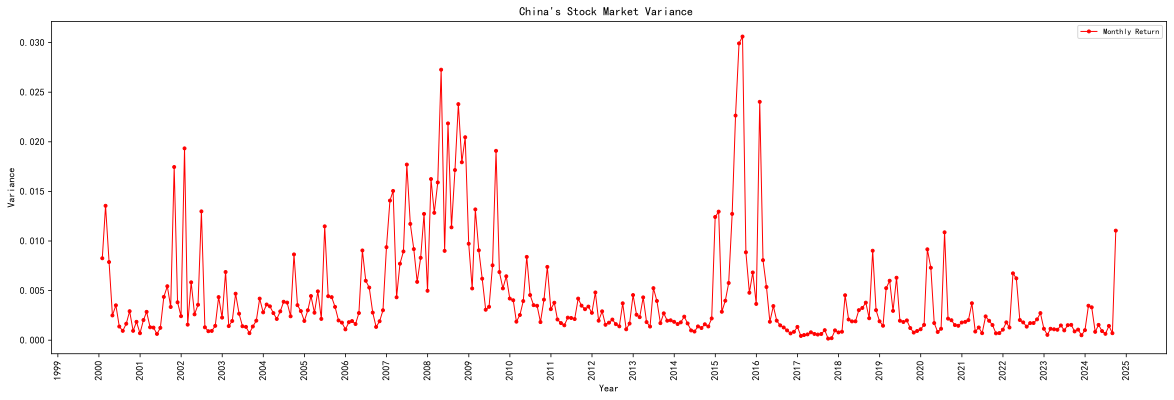

In [76]:
fig,ax=plt.subplots(figsize=(20,6))#选择图形大小

ax.plot('Variance', #图片数据
'.-',#图片类型，
color='r',#图片颜色
label='Monthly Return',#图片标签
linewidth=1,#图片线宽
data=Month_variance['2000':])#图片数据来源
ax.set_title("China's Stock Market Variance ")
ax.set_xlabel('Year')
ax.set_ylabel('Variance')

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

#转制x轴的日期显示格式
plt.xticks(rotation=90)

#添加图例
plt.legend(loc='upper right',fontsize=8)
fig.savefig('China_Stock_Market_Variance1.pdf')

plt.show();

## 偏度skewness

$$
S=\frac{1}{N}\sum^{N}_{i=1}[(\frac{R-\bar{R}}{\sigma})^3]
$$

data_new>0的占比

In [77]:
len(data_new[data_new['Return']>0])/len(data_new)

0.5226360238128201

Month_data>0的占比

In [79]:
len(Month_data[Month_data['Return']>0])/len(Month_data)

0.5266106442577031

Quarter_data>0的占比

In [81]:
Quarter_data=data_new.resample('QE')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
len(Quarter_data[Quarter_data['Return']>0])/len(Quarter_data)

0.5126050420168067

In [80]:
#日数据偏度
data_new['Return'].skew()

0.702469614038669

In [82]:
#月数据偏度
Month_data['Return'].skew()

0.32934257444025805